---
# KARM

Un problème d' __optimisation__

Fabrice Mulotti
Licence MIT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

## Définissons les paramètres de notre environnement

In [2]:
K=5 # nombre de bras
recompense_centre=5 # récompense moyenne
dispersion_recompense=4 # écart par rapport à la moyenne
dispersion_resultat_par_bras=2.0 # facteur pour l`écart type appliqué à chaque bras lors des tirages


## Déterminer pour chaque bras sa récompense moyenne et l'écart type

In [3]:
np.random.seed(seed=42)
recompense_moyenne_bras = np.random.random(K)*dispersion_recompense+5
ecart_type_bras = (np.random.random(K)+0.5)*dispersion_resultat_par_bras

In [4]:
recompense_moyenne_bras

array([6.49816048, 8.80285723, 7.92797577, 7.39463394, 5.62407456])

In [5]:
reference = np.flip(np.argsort(recompense_moyenne_bras))
print(f"Ordre des bras décroissant {reference}")

Ordre des bras décroissant [1 2 3 0 4]


In [6]:
ecart_type_bras

array([1.31198904, 1.11616722, 2.73235229, 2.20223002, 2.41614516])

In [7]:
## Visualisons sur 10000 tirages à  quoi ressemble les récompenses

In [8]:
np.random.seed(2023)
tirage=10000
sample = np.zeros((tirage,K))
for i in range(K):
    for j in range(tirage):
        sample[j,i]=np.random.normal(recompense_moyenne_bras[i],ecart_type_bras[i])

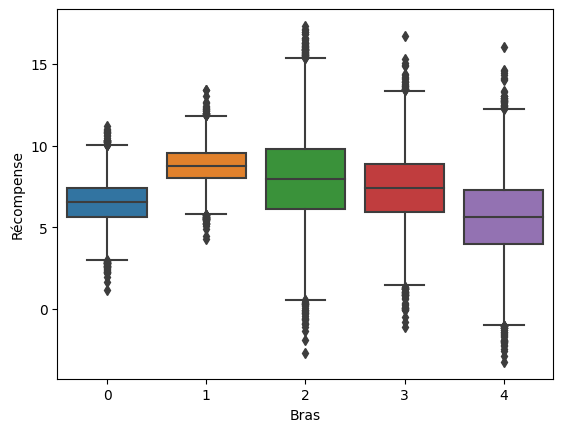

In [9]:
plt.figure()
sbn.boxplot(sample)
plt.xlabel("Bras")
plt.ylabel("Récompense")
plt.show()

![boxplots.jpg](static/boxplots.jpg)

***
## Functions et classes

In [10]:
def tirage(bras):
    # tirage pour un bras
    # entrée : numéro du bras
    # sortie : récompense pour un tirage
    return np.random.normal(recompense_moyenne_bras[bras],ecart_type_bras[bras])

In [11]:
def mean_reward(Q,N):
        return(np.divide(Q,N,where = N >0))

---
## Round Robin

Dans une approche Round Robin, on tire un même nombre de fois chaque bras.
C'est donc une approche 'brute'.

__excercice__
Compléter le code et tester avec 10000 itération

Sauvegarder le résultat cumulé pour 10K

In [12]:
# Ecrire une fonction qui renvoie les numéros de bras alternativement
# exmeple 0 -> 1 -> 2 -> 3 -> 4 -> 0 ......

def RoundRobinPolicy(action,K):
    # Round robin policy : tire un bras l'un après l'autre
    # input : mode = 0 : reinitialise, 1 : tire et incrémente, K nombre de bras
    # output : numéro de bras

    # VOTRE CODE
    
    return (action+1) % K


In [13]:
np.random.seed(2023)
nombre_tirage=10000

# conserver cet appel pour la suite pour comparer les résultats
# nombre de bras , valeur initial de la moyenne des récompenses, nom de la politique
result = []
action = K-1

for i in range(nombre_tirage):
    action = RoundRobinPolicy(action,K)
    reward = tirage(action)
    result.append(reward)

    

In [14]:
result_round_robin = np.cumsum(result) #? Cumul des récompenses 

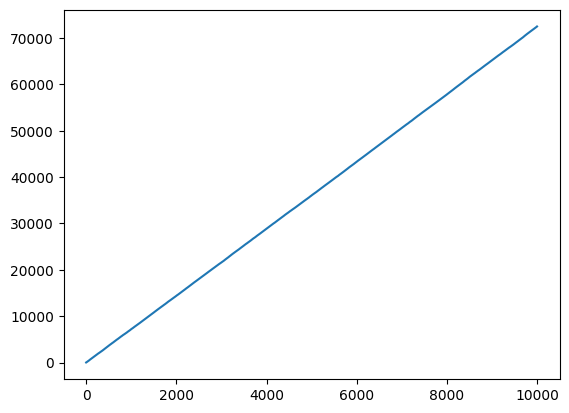

In [15]:
plt.figure()
plt.plot(result_round_robin)
plt.show()

---
# Greedy - valeur initiale élévée<br>
Avec une politique Greedy, notre algorithme choisi toujours le bras qui offre le meilleur rendement.

Donc si on a pas évalué au préalable les bras, et dans un environnement stable, il n'y a pas d'intérêt.

__Excercice__

Compléter le code

Tester pour 10K itérations avec initialisation des récompenses moyennes à 0

Tester pour 10K itérations avec initialisation des récompenses moyennes à 10



In [16]:
def greedyPolicy(num_action, mean_reward_per_arm):
    # purpose : choisi le bras qui rapporte le plus
    # input : nombre de bras, moyenne de résultat connu par bras.
    # output : bras choisi

    # votre code
    action = np.argmax(mean_reward_per_arm)
    return action

In [17]:
np.random.seed(2023)
nombre_tirage=10000
Q = np.full((K),10)
N = np.zeros((K))

result = []
for i in range(nombre_tirage):
    action= greedyPolicy(K,Q/(N+1))
    reward= tirage(action)
    Q[action] += reward
    N[action] += 1
    result.append(reward)


In [18]:
# stocker le résultat dans un tableau avec cumul
result_greedy_10 = np.cumsum(result)

<Figure size 640x480 with 0 Axes>

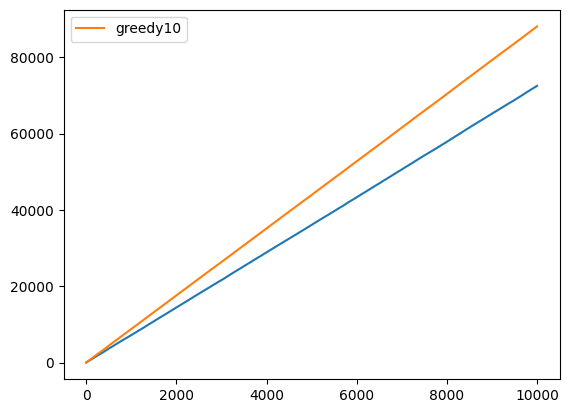

<Figure size 640x480 with 0 Axes>

In [19]:
# comparer les courbes
plt.figure()
plt.plot(result_round_robin)
plt.plot(result_greedy_10,label="greedy10")
plt.legend()
plt.figure()

***
## e-Greedy

e-Greedy (epsilon-glouton) choisit l'action réputée la plus payante selon une probabilité 1-epsilon ou aléatoire selon une probabilité epsilon.

Il va intéressant de jouer avec les deux paramètres :<br>
__epsilon__<br>
__la valeur initiale__<br>

A noter que dès 1000 tirage, egreedy a trouver 100% des bras par ordre de rendement

__Excercice__

Compléter le code et faire 10000 tirage en testant plusieur valeur d'epsilon

Comparer les résultats

In [20]:
def egreedyPolicy(num_action,epsilon,mean_reward_per_arm):

    # votre code
    r=np.random.uniform()
    if r < epsilon:
        return np.random.randint(num_action)
    
    return(np.argmax(mean_reward_per_arm))

In [21]:
np.random.seed(2023)
nombre_tirage=10000
epsilon=0.10

result=[]
N=np.zeros((K))
Q=np.zeros((K))

for i in range(nombre_tirage):
    action= egreedyPolicy(K,epsilon,mean_reward(Q,N))
    reward = tirage(action)
    Q[action] += reward
    N[action] += 1
    result.append(reward)    


In [22]:
# stocker le résultat dans un tableau avec cumul
result_epsilon_10 = np.cumsum(result)

<Figure size 640x480 with 0 Axes>

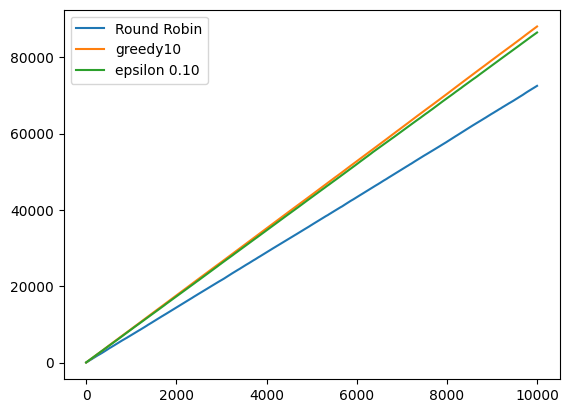

<Figure size 640x480 with 0 Axes>

In [23]:
# comparer les courbes
plt.figure()
plt.plot(result_round_robin,label="Round Robin")
plt.plot(result_greedy_10,label="greedy10")
plt.plot(result_epsilon_10,label="epsilon 0.10")

# plt.xlim(0,100)
# plt.ylim(0,1000)
plt.legend()
plt.figure()

## Comment pouvons nous interpréter le positionnement de la courbe epsilon vs greedy ?

---
# espilon greedy decay

Nous avons 3 paramètres :<br>
Nstep 
Epsilon max
Epsilon min

__Excercice__

Compléter le code

Comparer l'efficacité notamment avec epsilon fixe



In [24]:
np.random.seed(2023)
nombre_tirage=10000
epsilonMax=0.90
epsilonMin=0.05
NbPas = 1000
result=[]
eps=[]
Q=np.zeros((K))
N=np.zeros((K))

epsilon=epsilonMax
for i in range(nombre_tirage):
    action= egreedyPolicy(K,epsilon,mean_reward(Q,N))
    reward = tirage(action)
    result.append(reward)
    Q[action] += reward
    N[action] += 1
    
    # asjustement d'epsilon
    r=max((NbPas - i)/NbPas,0)
    epsilon = (epsilonMax-epsilonMin) * r + epsilonMin
    eps.append(epsilon)
    # voir cours
    


In [25]:
# stocker le résultat dans un tableau avec cumul
result_epsilon_decay = np.cumsum(result)

<Figure size 640x480 with 0 Axes>

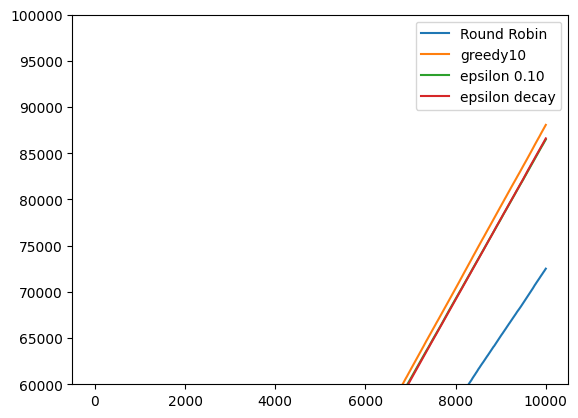

<Figure size 640x480 with 0 Axes>

In [26]:
# comparer les courbes
plt.figure()
plt.plot(result_round_robin,label="Round Robin")
plt.plot(result_greedy_10,label="greedy10")
plt.plot(result_epsilon_10,label="epsilon 0.10")
plt.plot(result_epsilon_decay,label="epsilon decay")
# plt.xlim(0,100)
plt.ylim(60000,100000)
plt.legend()
plt.figure()

In [27]:
N

array([ 183., 9236.,  214.,  179.,  188.])

---
# LinUCB

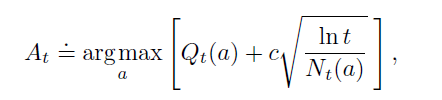

In [28]:
def linUCBPolicy(mean_reward_arm,arm_usage, c , num_tirage):
    # input
    # mean_reward_arm : récompense moyenne par bras
    # arm_usage : nombre d'utilisation pour tous les bras 
    # c : hyperparamètre
    # num_tirage : numero de tirage de notre exprérience

    return np.argmax(mean_reward_arm + c * np.square((np.log(num_tirage+1)/(arm_usage+1)))) # votre code

In [29]:
np.random.seed(2023)
nombre_tirage=10000

Q=np.zeros((K))
N=np.zeros((K))

result=[]
c=0.5

for i in range(nombre_tirage):
    action=linUCBPolicy(mean_reward(Q,N),N,c,i)
    reward = tirage(action)
    Q[action] += reward
    N[action] += 1
    result.append(reward)   
    


In [30]:
N

array([3.000e+00, 9.976e+03, 1.600e+01, 3.000e+00, 2.000e+00])

In [31]:
# stocker le résultat dans un tableau avec cumul
result_linUCB = np.cumsum(result)
    

<Figure size 640x480 with 0 Axes>

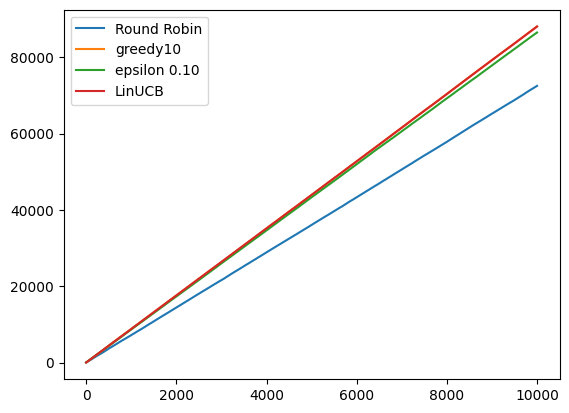

<Figure size 640x480 with 0 Axes>

In [32]:
# comparer les courbes

plt.figure()
plt.plot(result_round_robin,label="Round Robin")
plt.plot(result_greedy_10,label="greedy10")
plt.plot(result_epsilon_10,label="epsilon 0.10")
plt.plot(result_linUCB,label="LinUCB")

plt.legend()
plt.figure()

---
# Méthode du gradient

![static/gradient.png](static/gradient.png)

Soit H notre tableau des préférences

__Excercice__

Coder la police et l'algorithme de test complet

Comparer...

In [33]:
def gradientPolicy(H):
    return np.argmax(H)
   
def probArm(H,arm):
    return np.exp(H[arm])/np.sum(np.exp(H))

def updatePreference(H,moyenneR,num_tirage,action,reward):
    # mise à jour de l'action qui a été jouée
    H[action] = H[action] + alpha*(reward-moyenneR)*(1-probArm(H,action))
    for j in range(K):
        if j != action:
                H[j]=H[j] - alpha * (reward - moyenneR) * probArm(H,j)
    moyenneR = (moyenneR * num_tirage + reward ) / (num_tirage + 1) 
    return H , moyenneR                                      
    

In [34]:
np.random.seed(2023)
H=np.zeros((K))
nombre_tirage=10000

alpha=0.5
moyenneBaseline=5

for i in range(nombre_tirage):
    action=gradientPolicy(H)
    reward = tirage(action)
    
    # mise à jour des préférences
    H,moyenneR = updatePreference(H,moyenneBaseline,i,action, reward)



In [35]:
# stocker le résultat dans un tableau avec cumul
result_gradient=np.cumsum(result)

<Figure size 640x480 with 0 Axes>

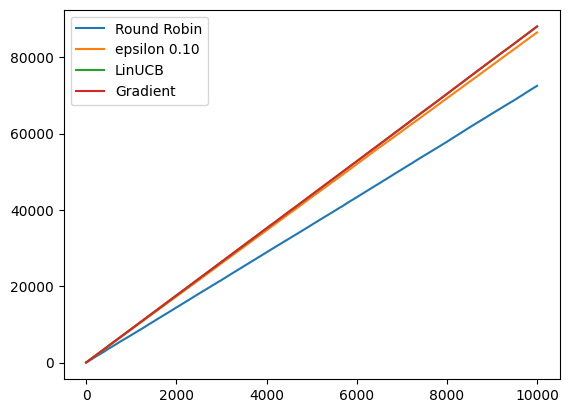

<Figure size 640x480 with 0 Axes>

In [36]:
# comparer les courbes
plt.figure()
plt.plot(result_round_robin,label="Round Robin")
# plt.plot(result_greedy_10,label="greedy10")
plt.plot(result_epsilon_10,label="epsilon 0.10")
plt.plot(result_linUCB,label="LinUCB")
plt.plot(result_gradient,label="Gradient")

plt.legend()
plt.figure()

In [37]:
result_epsilon_10[-1]

86494.01724963404

In [38]:
result_gradient[-1]

88065.15408747243

In [39]:
result_linUCB[-1]

88065.15408747243